# Job Change Prediction

# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
train=pd.read_csv(r"C:\Users\RAJ\Desktop\dsp lab\aug_train.csv")
test=pd.read_csv(r"C:\Users\RAJ\Desktop\dsp lab\aug_test.csv")

In [7]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
len(train.columns)

14

# Data Cleaning

In [9]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

There are a lot of null values in this dataset so we will first check the shape if we can directly remove all the rows with empty values and than check if it is sufficient to predict the test data...

In [10]:
train.shape

(19158, 14)

In [11]:
train=train.dropna()
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [12]:
train=train.reset_index(drop=True)
train.shape


(8955, 14)

In [13]:
test.shape

(2129, 13)

In [14]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [15]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [16]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [17]:
print(test['gender'].mode())

0    Male
Name: gender, dtype: object


In [18]:
test['gender'].fillna(value='Male',inplace=True)

In [19]:
test['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: object

In [20]:
#Filling enrolled_university column
test['enrolled_university'].fillna(value='no_enrollment',inplace=True)

In [21]:
#Filling education_level
test['education_level'].mode()

0    Graduate
Name: education_level, dtype: object

In [22]:
test['education_level'].fillna(value='Graduate',inplace=True)

In [23]:
#Filling major_discipline 

test['major_discipline'].mode()

0    STEM
Name: major_discipline, dtype: object

In [24]:
test['major_discipline'].fillna(value='STEM',inplace=True)

In [25]:
#Filling experience
test['experience'].mode()

0    >20
Name: experience, dtype: object

In [26]:
test['experience'].fillna(value='>20',inplace=True)

In [27]:
#Filling company size

test['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [28]:
test['company_size'].fillna(value='50-99',inplace=True)

In [29]:
#Filling company_type

test['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [30]:
test['company_type'].fillna(value='Pvt Ltd',inplace=True)

In [31]:
#Filling last new job

test['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [32]:
test['last_new_job'].fillna(value='1',inplace=True)

In [33]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# Data Visualization

In [34]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


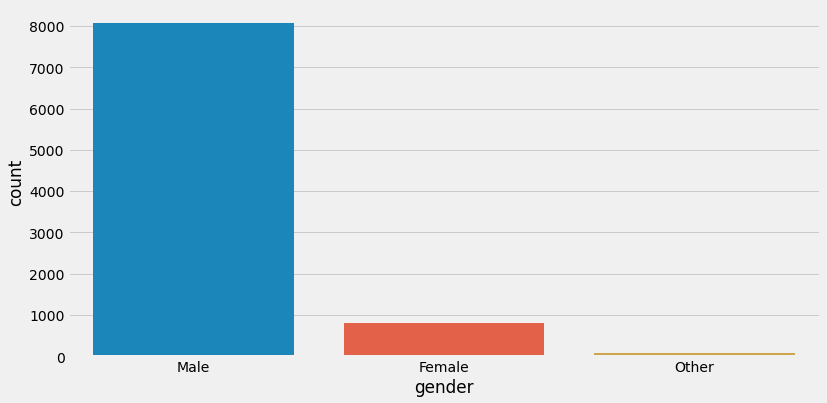

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(train['gender'])
plt.show()

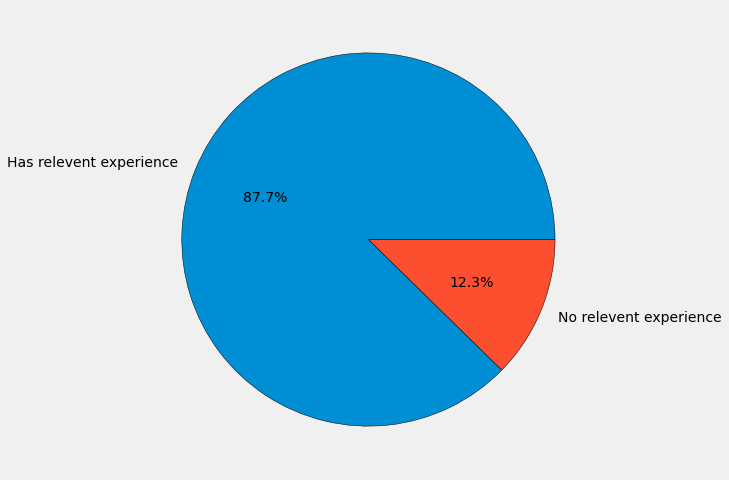

In [36]:
index=train['relevent_experience'].value_counts().index
values=train['relevent_experience'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.show()

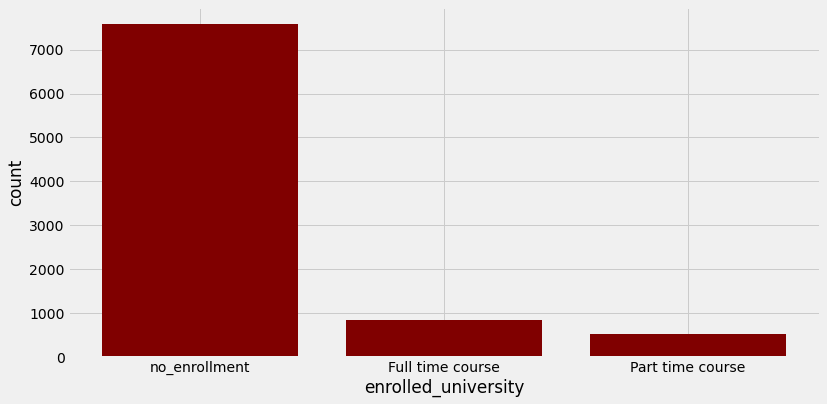

In [37]:
index=train['enrolled_university'].value_counts().index
values=train['enrolled_university'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='maroon')
plt.xlabel("enrolled_university")
plt.ylabel("count")
plt.show()

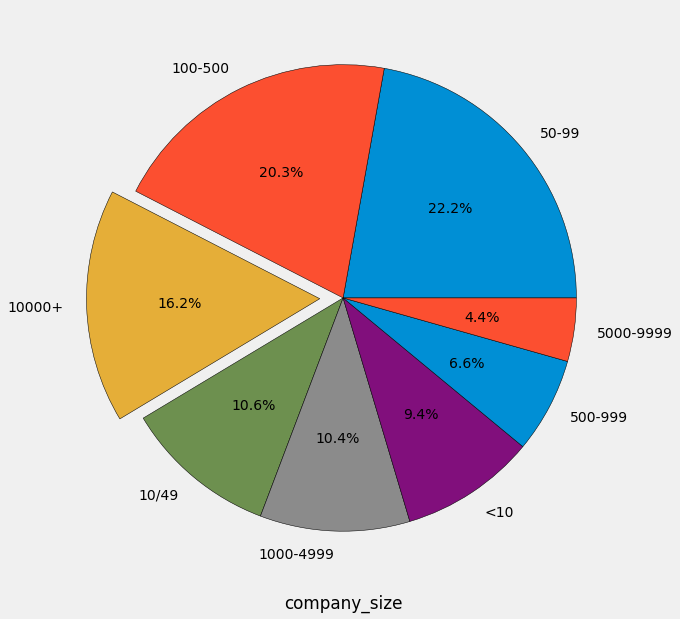

In [38]:
index=train['company_size'].value_counts().index
values=train['company_size'].value_counts()
plt.figure(figsize=(18,10))
plt.xlabel('company_size')
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={"edgecolor":"black"},explode=[0,0,0.1,0,0,0,0,0])
plt.show()

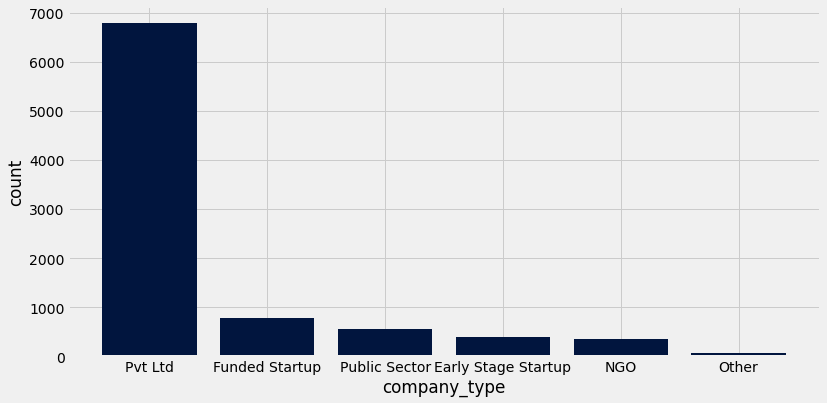

In [39]:
index=train['company_type'].value_counts().index
values=train['company_type'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='#01153E')
plt.xlabel("company_type")
plt.ylabel("count")
plt.show()

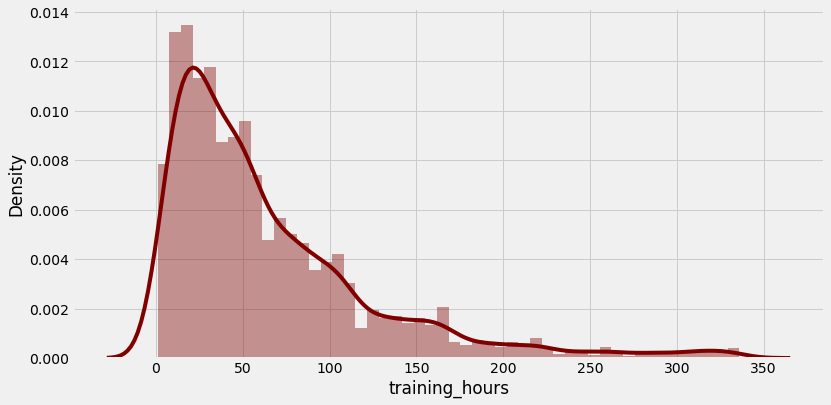

In [40]:
plt.figure(figsize=(12,6))
sns.distplot(train['training_hours'],color='maroon')
plt.show()

In [41]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [42]:
train['experience'].value_counts()

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
8       398
15      398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64

In [43]:
exp_20=train.loc[train['experience']=='>20']

In [44]:
exp_20.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,25619,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,0.0
11,14928,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,3,40,0.0
13,26966,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,82,0.0
16,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1.0


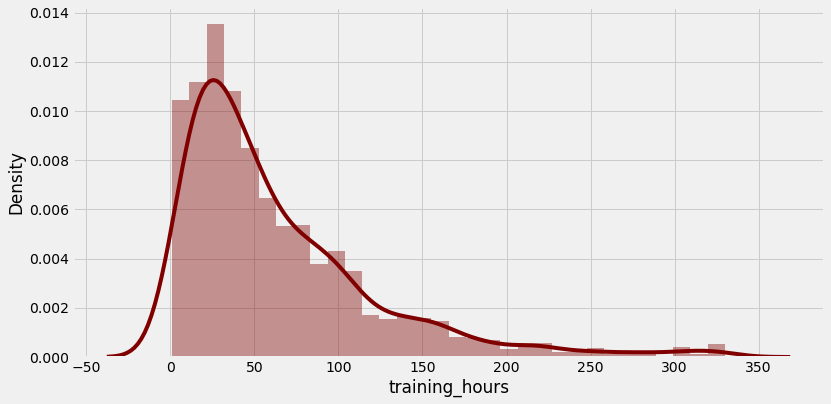

In [45]:
plt.figure(figsize=(12,6))
sns.distplot(exp_20['training_hours'],color='maroon')
plt.show()

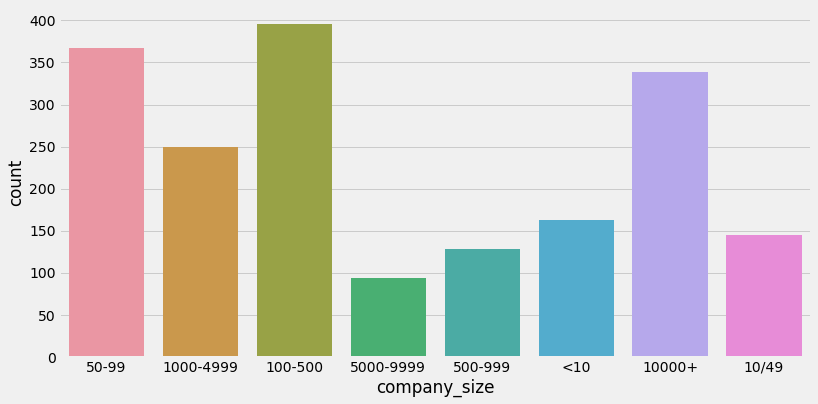

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(exp_20['company_size'])
plt.show()

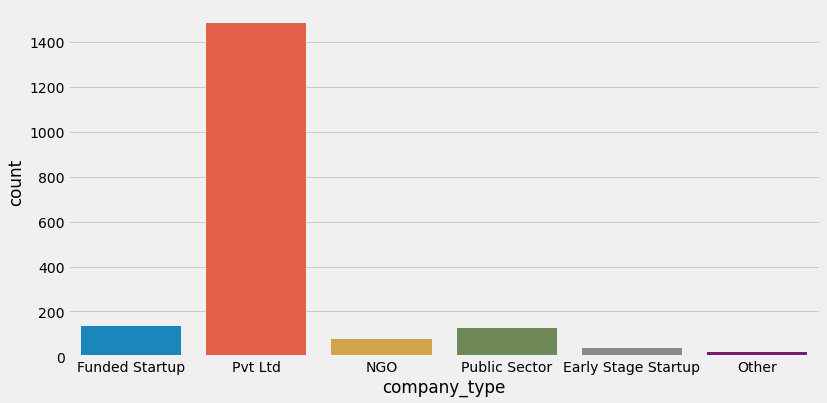

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(exp_20['company_type'])
plt.show()

In [48]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


Changing target variable to integer...

In [49]:
train['target']=train['target'].astype('int64')

Comparing features with target

0-Not looking for job change , 1-Looking for job change

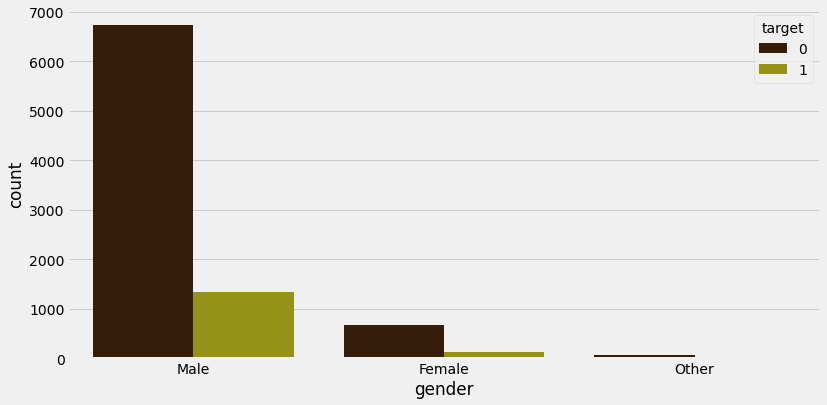

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x="gender",hue="target",data=train,palette=['#3D1C02',"#AAA602"])
plt.show()

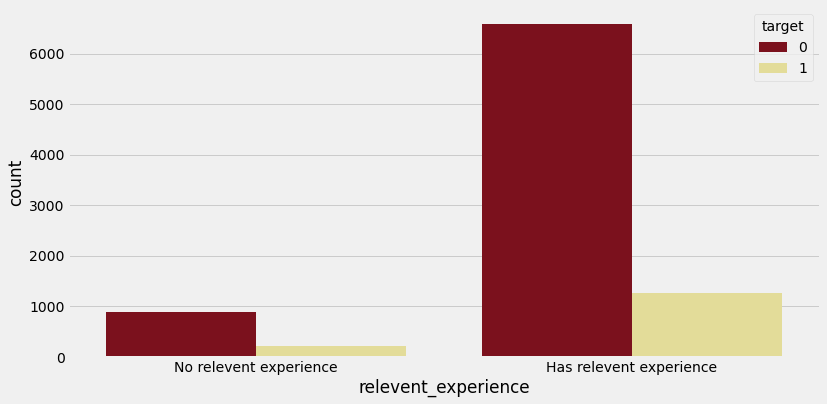

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x="relevent_experience",hue="target",data=train,palette=['#8C000F',"#F0E68C"])
plt.show()

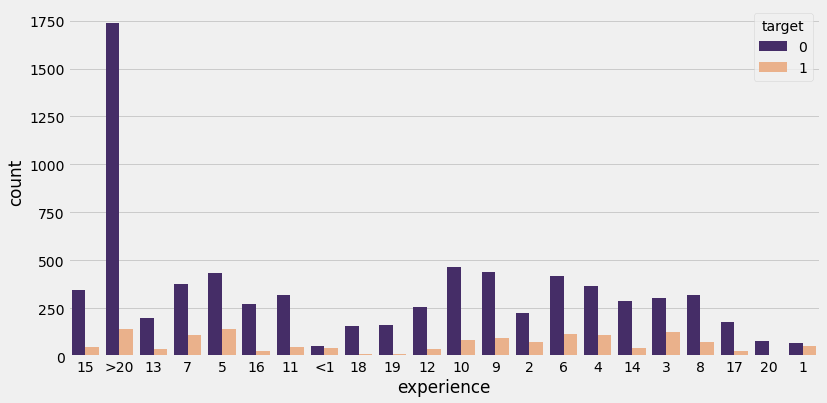

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x="experience",hue="target",data=train,palette=['#432371',"#FAAE7B"])
plt.show()

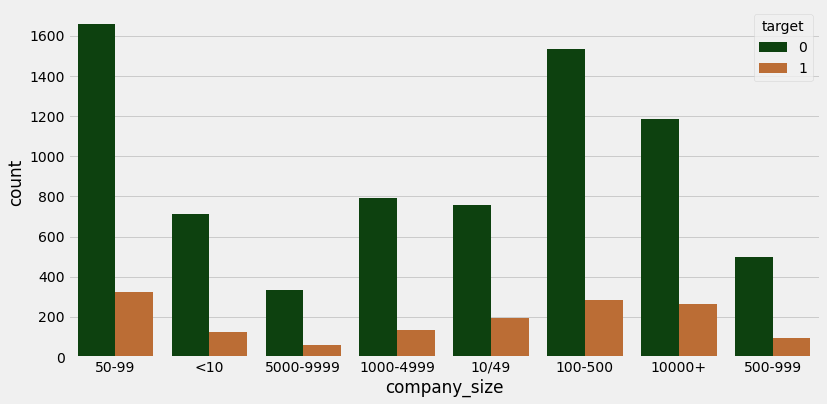

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_size",hue="target",data=train,palette=['#054907',"#D2691E"])
plt.show()

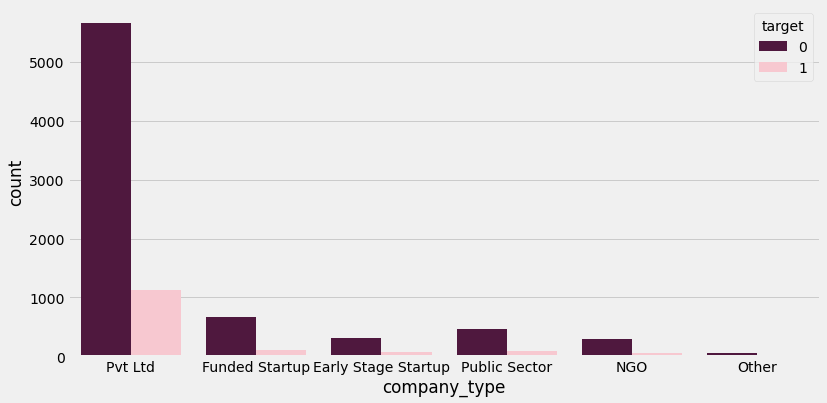

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_type",hue="target",data=train,palette=['#580F41',"#FFC0CB"])
plt.show()

In [55]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


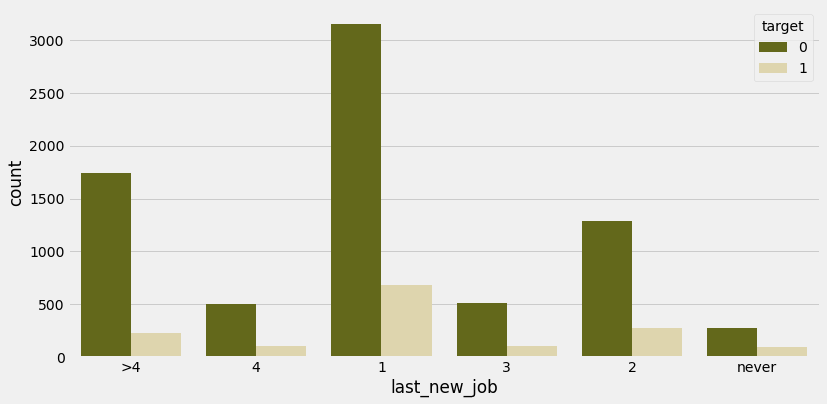

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x="last_new_job",hue="target",data=train,palette=['#6E750E',"#E6DAA6"])
plt.show()

In [57]:
train.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


In [58]:
train['relevent_experience']=train['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

Now we will use get_dummies for those columns who have more than 2 categorical values as it works more accurately when we predict our values as our target is in 2 categorical values manner...

In [59]:
dummies=pd.get_dummies(train[['enrolled_university']])
train = pd.concat([train.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [60]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment'],
      dtype='object')

In [61]:
dummies=pd.get_dummies(train[['gender']])
train = pd.concat([train.drop(['gender'],axis=1), dummies],axis=1)

I am dropping here education level as when i tested it with get_dummies than one value was making more column in test dataset as that value droppped from train in dropna, thus increasing the columns in test dataset...

In [62]:
train=train.drop("education_level",axis=1)

In [63]:
dummies=pd.get_dummies(train[['major_discipline']])
train = pd.concat([train.drop(['major_discipline'],axis=1), dummies],axis=1)

In [64]:
dummies=pd.get_dummies(train[['experience']])
train = pd.concat([train.drop(['experience'],axis=1), dummies],axis=1)

In [65]:
dummies=pd.get_dummies(train[['company_size']])
train = pd.concat([train.drop(['company_size'],axis=1), dummies],axis=1)

In [66]:
dummies=pd.get_dummies(train[['company_type']])
train = pd.concat([train.drop(['company_type'],axis=1), dummies],axis=1)

In [67]:
dummies=pd.get_dummies(train[['last_new_job']])
train = pd.concat([train.drop(['last_new_job'],axis=1), dummies],axis=1)

Similarly in test dataset

In [68]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [69]:
test['relevent_experience']=test['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

In [70]:
dummies=pd.get_dummies(test[['gender']])
test = pd.concat([test.drop(['gender'],axis=1), dummies],axis=1)

In [71]:
test=test.drop("education_level",axis=1)

In [72]:
dummies=pd.get_dummies(test[['enrolled_university']])
test = pd.concat([test.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [73]:
dummies=pd.get_dummies(test[['major_discipline']])
test = pd.concat([test.drop(['major_discipline'],axis=1), dummies],axis=1)

In [74]:
dummies=pd.get_dummies(test[['experience']])
test = pd.concat([test.drop(['experience'],axis=1), dummies],axis=1)

In [75]:
dummies=pd.get_dummies(test[['company_size']])
test = pd.concat([test.drop(['company_size'],axis=1), dummies],axis=1)

In [76]:
dummies=pd.get_dummies(test[['company_type']])
test = pd.concat([test.drop(['company_type'],axis=1), dummies],axis=1)

In [77]:
dummies=pd.get_dummies(test[['last_new_job']])
test = pd.concat([test.drop(['last_new_job'],axis=1), dummies],axis=1)

In [78]:
print(train.shape)
print(test.shape)

(8955, 60)
(2129, 59)


So we have done with this part as we can see that there is one more column present in train dataset which is target variable...

In [79]:
len(train.columns)

60

In [80]:
train.head()

,enrollee_id,city,city_development_index,relevent_experience,training_hours,target,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,gender_Female,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,29725,city_40,0.776,0,47,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,666,city_162,0.767,1,8,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,402,city_46,0.762,1,18,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,27107,city_103,0.920,1,46,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,23853,city_103,0.920,1,108,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


# MODEL BUILDING

In [81]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'training_hours', 'target', 'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'gender_Female', 'gender_Male',
       'gender_Other', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'experience_1', 'experience_10',
       'experience_11', 'experience_12', 'experience_13', 'experience_14',
       'experience_15', 'experience_16', 'experience_17', 'experience_18',
       'experience_19', 'experience_2', 'experience_20', 'experience_3',
       'experience_4', 'experience_5', 'experience_6', 'experience_7',
       'experience_8', 'experience_9', 'experience_<1', 'experience_>20',
       'company_size_10/49', 'company_size_100-500', 'company_size_1000-4999',
       'company_size_10000+

We will use .columns function as we have increased a lot of columns and will drop columns directly from the X which are not required...

# TRAIN TEST SPLITTING

In [82]:
X=train.drop(['enrollee_id','city','target'],axis=1)
y=train[['target']]

In [83]:
import sklearn
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6268, 57)
(6268, 1)
(2687, 57)
(2687, 1)


# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [87]:
predictions=model.predict(X_test)
model.score(X_test,y_test)

0.8395980647562337

# Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
model_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
predictions_2=model_2.predict(X_test)
model_2.score(X_test,y_test)

0.7729810197245999

# Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()
model_3.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
predictions_3=model_3.predict(X_test)
model_3.score(X_test,y_test)

0.8466691477484183

# KNeighbors Classifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
model_4=KNeighborsClassifier()
model_4.fit(X_train,y_train)


KNeighborsClassifier()

In [93]:
predictions_4=model_4.predict(X_test)
model_4.score(X_test,y_test)

0.8228507629326386

# SVM

In [94]:
from sklearn.svm import SVC
model_5=SVC()
model_5.fit(X_train,y_train)

SVC()

In [95]:
predictions_5=model_5.predict(X_test)
model_5.score(X_test,y_test)

0.8373650911797543

So now maximum score in prediction is of Random Forest Classifier. So now we will predict our target variable by using this algorithm...

In [96]:
test=test.drop(['enrollee_id','city'],axis=1)
model_3.fit(X,y)

RandomForestClassifier()

In [97]:
final_predictions=model_3.predict(test)
final_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
with np.printoptions(threshold=np.inf):
    print(final_predictions)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 